In [141]:
import tensorflow as tf
from tensorflow import keras
import numpy as np               
import matplotlib.pyplot as plt

In [142]:
model = keras.Sequential([
  # keras.layers.InputLayer(input_shape=(1,)),
  keras.layers.Dense(units=8, input_shape=(1,), name='my_dense_input_1'),
  keras.layers.Dense(units=4, name='my_dense_input_2')
], name='my_model_1')

model.summary()
model.layers

model.layers[0].name
model.get_layer(index=0).name
model.get_layer(name='my_dense_input_1').name

Model: "my_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_dense_input_1 (Dense)    (None, 8)                 16        
                                                                 
 my_dense_input_2 (Dense)    (None, 4)                 36        
                                                                 
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________


'my_dense_input_1'

In [143]:
model.add(keras.layers.Dense(units=1, name='my_dense_last_output'))

model.summary()

Model: "my_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_dense_input_1 (Dense)    (None, 8)                 16        
                                                                 
 my_dense_input_2 (Dense)    (None, 4)                 36        
                                                                 
 my_dense_last_output (Dense  (None, 1)                5         
 )                                                               
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [144]:
model.pop()
model.summary()

Model: "my_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_dense_input_1 (Dense)    (None, 8)                 16        
                                                                 
 my_dense_input_2 (Dense)    (None, 4)                 36        
                                                                 
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________


In [145]:
X = np.ones(5).reshape(5,1)
print(X.shape)

(5, 1)


In [146]:
model2 = keras.Sequential()

layer1 = keras.layers.Dense(10, input_shape=(1,))
layer2 = keras.layers.Dense(5)

model2.add(layer1)
model2.add(layer2)
model2.summary()

# other type
# model3 = keras.Sequential([layer1, layer2 ...])

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 10)                20        
                                                                 
 dense_58 (Dense)            (None, 5)                 55        
                                                                 
Total params: 75
Trainable params: 75
Non-trainable params: 0
_________________________________________________________________


In [147]:
keras.utils.plot_model(model2)

out1 = model2.predict(X)
print(out1, np.array(out1).shape)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
1/1 [==============================] - 0s 42ms/step
[[-0.835791   -0.13618928 -0.13095754 -0.09250429  0.46671432]
 [-0.835791   -0.13618928 -0.13095754 -0.09250429  0.46671432]
 [-0.835791   -0.13618928 -0.13095754 -0.09250429  0.46671432]
 [-0.835791   -0.13618928 -0.13095754 -0.09250429  0.46671432]
 [-0.835791   -0.13618928 -0.13095754 -0.09250429  0.46671432]] (5, 5)


In [148]:
#### functional model

input_layer = keras.layers.Input(shape=(1,))
hidden_layer1 = keras.layers.Dense(1, name='hidden1')
hidden_layer2 = keras.layers.Dense(1, name='hidden2')
output_layer = keras.layers.Dense(1, name='output')

# step1 = hidden_layer1(input_layer)
# step2 = hidden_layer2(step1)
# step3 = output_layer(step2)

step1 = hidden_layer1(input_layer)
step2 = hidden_layer2(input_layer)
step3 = output_layer(step2)

model = keras.Model(inputs=[input_layer], outputs=[step1, step3])
keras.utils.plot_model(model)

out2 = model.predict(X)
print(out2, np.array(out2).shape)

keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
1/1 [==============================] - 0s 39ms/step
[array([[-0.29676044],
       [-0.29676044],
       [-0.29676044],
       [-0.29676044],
       [-0.29676044]], dtype=float32), array([[-0.39403194],
       [-0.39403194],
       [-0.39403194],
       [-0.39403194],
       [-0.39403194]], dtype=float32)] (2, 5, 1)
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [149]:
input_layer = keras.layers.Input(shape=(1,))
hidden_layer1 = keras.layers.Dense(1, name='hidden1')(input_layer)
hidden_layer2 = keras.layers.Dense(1, name='hidden2')(input_layer)
output_layer = keras.layers.Dense(1, name='output')(hidden_layer2)

model = keras.Model(inputs=[input_layer], outputs=[hidden_layer1, output_layer])
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [150]:
#### Layer

model = keras.Sequential([
  keras.layers.Dense(units=1, input_shape=(1,), name="my_dense_input", kernel_initializer=tf.keras.initializers.Ones()) # 초기값 설정 가능
], name='my_model1')

# model.summary()

layer1 = model.get_layer(index=0)

layer1.weights

layer1.get_weights()

# layer1.set_weights([np.array([[0.12345]]), np.array([0.54321])])  # 인자 : 기울기, 절편
# layer1.get_weights()

# layer1.trainable_weights

layer1.trainable = False
layer1.trainable_weights  # 전이 학습 시 활용

model.summary()

Model: "my_model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_dense_input (Dense)      (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 0
Non-trainable params: 2
_________________________________________________________________


In [153]:
model = keras.Sequential([
  keras.layers.Dense(units=1, input_shape=(1,), activation='relu')
], name='my_model1')

model = keras.Sequential([
  keras.layers.Dense(units=1, input_shape=(1,)), keras.layers.ReLU()
], name='my_model2')

model = keras.Sequential([
  keras.layers.Dense(units=1, input_shape=(1,)), keras.layers.Activation('relu')
], name='my_model3')

model = keras.Sequential([
  keras.layers.Dense(units=1, input_shape=(1,), activation=keras.activations.relu)
], name='my_model4')

model = keras.Sequential([
  keras.layers.Dense(1, input_shape=(1,)),
  keras.layers.Activation(keras.activations.relu)
])

model = keras.Sequential([
  keras.layers.Dense(1, input_shape=(1,)),
  keras.layers.ReLU()
])


4/4 [==============================] - 0s 997us/step


array([[-3.        ],
       [-2.939394  ],
       [-2.878788  ],
       [-2.8181818 ],
       [-2.757576  ],
       [-2.6969697 ],
       [-2.6363637 ],
       [-2.5757575 ],
       [-2.5151517 ],
       [-2.4545455 ],
       [-2.3939395 ],
       [-2.3333335 ],
       [-2.2727273 ],
       [-2.2121212 ],
       [-2.1515152 ],
       [-2.0909092 ],
       [-2.0303032 ],
       [-1.9696971 ],
       [-1.909091  ],
       [-1.848485  ],
       [-1.7878789 ],
       [-1.7272729 ],
       [-1.6666666 ],
       [-1.6060606 ],
       [-1.5454546 ],
       [-1.4848485 ],
       [-1.4242425 ],
       [-1.3636364 ],
       [-1.3030304 ],
       [-1.2424242 ],
       [-1.1818182 ],
       [-1.1212122 ],
       [-1.0606061 ],
       [-1.        ],
       [-0.93939394],
       [-0.87878793],
       [-0.8181819 ],
       [-0.7575758 ],
       [-0.69696975],
       [-0.6363636 ],
       [-0.5757576 ],
       [-0.5151515 ],
       [-0.45454547],
       [-0.3939394 ],
       [-0.33333337],
       [-0

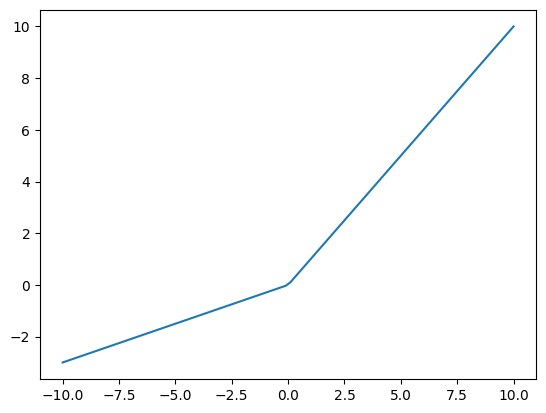

In [163]:
X = np.linspace(-10, 10, 100).reshape(100, 1)
model = keras.Sequential([
  # keras.layers.Activation(keras.activations.sigmoid)
  # keras.layers.Activation('sigmoid')
  # keras.layers.Activation('relu')
  # keras.layers.ReLU(negative_slope=0.2)
  # keras.layers.ELU()
  keras.layers.LeakyReLU()
])

_, axe = plt.subplots()
axe.plot(X, model.predict(X))
model.predict(X)